In [238]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#We read the files

# covidmap=gpd.read_file("../data/comarques_1M/divisions-administratives-v2r1-comarques-1000000-20250730.shp")
#covidmap=gpd.read_file("../data/comarques_5K/divisions-administratives-v2r1-comarques-5000-20250730.shp")
#covid=pd.read_csv("../data/covid.csv")

covidmap=gpd.read_file(r'/Users/sergig.r/Desktop/comarques/comarques_1M/divisions-administratives-v2r1-comarques-1000000-20250730.shp')
covid=pd.read_csv(r'/Users/sergig.r/Desktop/covid.csv')

#covidmap=gpd.read_file(r'/Users/sergig.r/Desktop/municipis/municipis_1M/divisions-administratives-v2r1-municipis-1000000-20250730.shp')
#covid=pd.read_csv(r'/Users/sergig.r/Desktop/covid.csv')

In [239]:
covid.head()

TipusCasData  ComarcaCodi  ComarcaDescripcio  MunicipiCodi  \
0   08/10/2020         21.0            MARESME        8121.0   
1   05/07/2022         23.0            NOGUERA       25240.0   
2   12/06/2020          7.0              BAGES        8191.0   
3   13/01/2022         24.0              OSONA        8037.0   
4   11/06/2022         40.0  VALLÈS OCCIDENTAL        8279.0   

       MunicipiDescripcio  DistricteCodi DistricteDescripcio  SexeCodi  \
0                  MATARÓ            NaN      Not classified       1.0   
1  VALLFOGONA DE BALAGUER            NaN      Not classified       1.0   
2                 SALLENT            NaN      Not classified       1.0   
3             CALLDETENES            NaN      Not classified       1.0   
4                TERRASSA            NaN      Not classified       0.0   

  SexeDescripcio      TipusCasDescripcio  NumCasos  
0         Female  Positiu per Test Ràpid         1  
1         Female             Positiu TAR         2  
2         Female  Positiu per Test Ràpid         1  
3         Female             Positiu PCR         1  
4           Male             Positiu TAR        10

In [240]:
covidmap.head()

CODICOMAR        NOMCOMAR                CAPCOMAR  AREAC5000  \
0        01        Alt Camp                   Valls   537.8597   
1        02     Alt Empordà                Figueres  1356.9070   
2        03     Alt Penedès  Vilafranca del Penedès   592.5553   
3        04      Alt Urgell         la Seu d'Urgell  1446.6785   
4        05  Alta Ribagorça        el Pont de Suert   427.2234   

                                            geometry  
0  POLYGON ((373020.449 4590188.741, 372482.744 4...  
1  MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  
2  POLYGON ((386593.3 4595896.2, 388616.1 4595870...  
3  MULTIPOLYGON (((360800.1 4649174, 360624.5 464...  
4  POLYGON ((327485.124 4721105.796, 327436.728 4...

In [241]:
#covidmap["NOMMUNI"]=covidmap["NOMMUNI"].str.upper() #We rewrite the cities names in capital letters.
#covidmap.head()
covidmap["NOMCOMAR"]=covidmap["NOMCOMAR"].str.upper()

In [242]:
# Simplify geometry (reduce points)
# covidmap["geometry"] = covidmap["geometry"].simplify(tolerance=500, preserve_topology=True)




covid=covid.rename(columns={"ComarcaDescripcio": "NOMCOMAR"})
#covid=covid.rename(columns={"MunicipiDescripcio": "NOMMUNI"})#Change city columns name to be the same as covidmap


print(covid.columns)
print(covidmap.columns)


covid_comarca = covid[["NOMCOMAR", "NumCasos"]].groupby("NOMCOMAR")["NumCasos"].sum().reset_index()
#covid_municipi = covid[["NOMMUNI", "NumCasos"]].groupby("NOMMUNI")["NumCasos"].sum().reset_index()
covid.head()



Index(['TipusCasData', 'ComarcaCodi', 'NOMCOMAR', 'MunicipiCodi',
       'MunicipiDescripcio', 'DistricteCodi', 'DistricteDescripcio',
       'SexeCodi', 'SexeDescripcio', 'TipusCasDescripcio', 'NumCasos'],
      dtype='object')
Index(['CODICOMAR', 'NOMCOMAR', 'CAPCOMAR', 'AREAC5000', 'geometry'], dtype='object')


TipusCasData  ComarcaCodi           NOMCOMAR  MunicipiCodi  \
0   08/10/2020         21.0            MARESME        8121.0   
1   05/07/2022         23.0            NOGUERA       25240.0   
2   12/06/2020          7.0              BAGES        8191.0   
3   13/01/2022         24.0              OSONA        8037.0   
4   11/06/2022         40.0  VALLÈS OCCIDENTAL        8279.0   

       MunicipiDescripcio  DistricteCodi DistricteDescripcio  SexeCodi  \
0                  MATARÓ            NaN      Not classified       1.0   
1  VALLFOGONA DE BALAGUER            NaN      Not classified       1.0   
2                 SALLENT            NaN      Not classified       1.0   
3             CALLDETENES            NaN      Not classified       1.0   
4                TERRASSA            NaN      Not classified       0.0   

  SexeDescripcio      TipusCasDescripcio  NumCasos  
0         Female  Positiu per Test Ràpid         1  
1         Female             Positiu TAR         2  
2         Female  Positiu per Test Ràpid         1  
3         Female             Positiu PCR         1  
4           Male             Positiu TAR        10

In [243]:
from matplotlib.colors import LogNorm

covid_comarca=covid_comarca.dropna()
#covid_municipi=covid_municipi.dropna()

#covid_comarca['CODICOMAR']=covid_comarca['CODICOMAR'].astype(float).astype(int).astype(str)
#covid_comarca['CODICOMAR']=covid_comarca['CODICOMAR'].str.zfill(2)
#covidmap['CODICOMAR']=covidmap['CODICOMAR'].astype(str).str.zfill(2)

#covidmap_covid=covidmap.merge(covid_municipi, on="NOMMUNI", how="left")
covidmap_covid=covidmap.merge(covid_comarca, on="NOMCOMAR", how="left")




#covidmap_covid.head()


In [244]:
covid.head()


TipusCasData  ComarcaCodi           NOMCOMAR  MunicipiCodi  \
0   08/10/2020         21.0            MARESME        8121.0   
1   05/07/2022         23.0            NOGUERA       25240.0   
2   12/06/2020          7.0              BAGES        8191.0   
3   13/01/2022         24.0              OSONA        8037.0   
4   11/06/2022         40.0  VALLÈS OCCIDENTAL        8279.0   

       MunicipiDescripcio  DistricteCodi DistricteDescripcio  SexeCodi  \
0                  MATARÓ            NaN      Not classified       1.0   
1  VALLFOGONA DE BALAGUER            NaN      Not classified       1.0   
2                 SALLENT            NaN      Not classified       1.0   
3             CALLDETENES            NaN      Not classified       1.0   
4                TERRASSA            NaN      Not classified       0.0   

  SexeDescripcio      TipusCasDescripcio  NumCasos  
0         Female  Positiu per Test Ràpid         1  
1         Female             Positiu TAR         2  
2         Female  Positiu per Test Ràpid         1  
3         Female             Positiu PCR         1  
4           Male             Positiu TAR        10

In [245]:
covidmap.head()

CODICOMAR        NOMCOMAR                CAPCOMAR  AREAC5000  \
0        01        ALT CAMP                   Valls   537.8597   
1        02     ALT EMPORDÀ                Figueres  1356.9070   
2        03     ALT PENEDÈS  Vilafranca del Penedès   592.5553   
3        04      ALT URGELL         la Seu d'Urgell  1446.6785   
4        05  ALTA RIBAGORÇA        el Pont de Suert   427.2234   

                                            geometry  
0  POLYGON ((373020.449 4590188.741, 372482.744 4...  
1  MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  
2  POLYGON ((386593.3 4595896.2, 388616.1 4595870...  
3  MULTIPOLYGON (((360800.1 4649174, 360624.5 464...  
4  POLYGON ((327485.124 4721105.796, 327436.728 4...

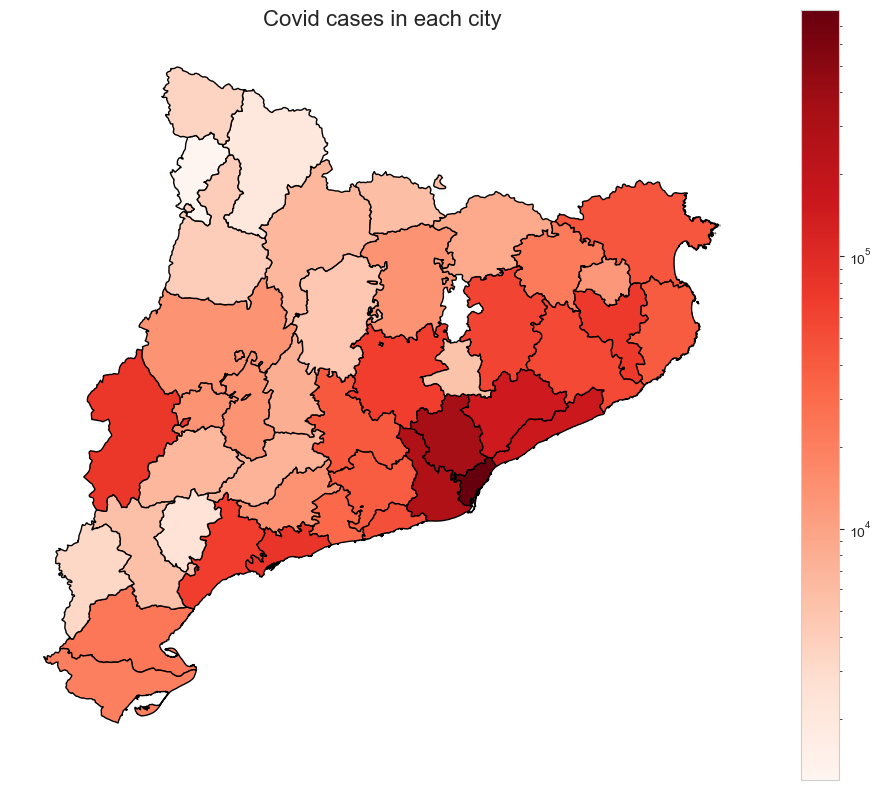

In [246]:
ax=covidmap_covid.plot(
 column="NumCasos",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 norm= LogNorm(vmin=covidmap_covid["NumCasos"].min(),
                 vmax=covidmap_covid["NumCasos"].max())
)

ax.set_title("Covid cases in each city", fontsize=16)
ax.set_axis_off()
plt.show()

In [247]:
poblacio0=pd.read_csv(r'/Users/sergig.r/Desktop/poblacio/poblacioo.csv')

poblacio0["row"]=poblacio0["row"].str.upper()
poblacio = poblacio0[poblacio0["col"] == "Població"][["row", "value"]]#generate a column only with the population


In [248]:

poblacio=poblacio.rename(columns={"row": "NOMCOMAR"})
densitat=covidmap_covid.merge(poblacio, on="NOMCOMAR", how="left")

densitat["density"] = densitat["NumCasos"] / densitat["value"]#value is the column for the population of each comarca
densitat.head()


CODICOMAR        NOMCOMAR                CAPCOMAR  AREAC5000  \
0        01        ALT CAMP                   Valls   537.8597   
1        02     ALT EMPORDÀ                Figueres  1356.9070   
2        03     ALT PENEDÈS  Vilafranca del Penedès   592.5553   
3        04      ALT URGELL         la Seu d'Urgell  1446.6785   
4        05  ALTA RIBAGORÇA        el Pont de Suert   427.2234   

                                            geometry  NumCasos     value  \
0  POLYGON ((373020.449 4590188.741, 372482.744 4...   13778.0   44695.0   
1  MULTIPOLYGON (((513760.14 4662388.22, 513758.6...   43064.0  142624.0   
2  POLYGON ((386593.3 4595896.2, 388616.1 4595870...   38196.0  109606.0   
3  MULTIPOLYGON (((360800.1 4649174, 360624.5 464...    6631.0   20231.0   
4  POLYGON ((327485.124 4721105.796, 327436.728 4...    1197.0    3825.0   

    density  
0  0.308267  
1  0.301941  
2  0.348485  
3  0.327764  
4  0.312941

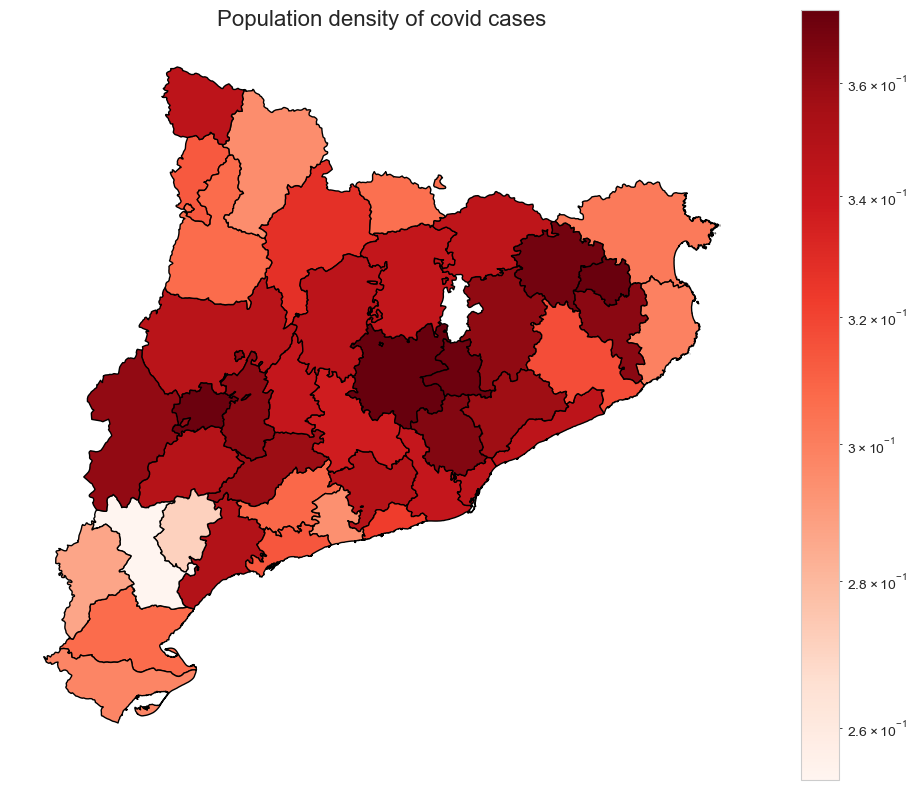

In [249]:
ax=densitat.plot(
 column="density",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 norm= LogNorm(vmin=densitat["density"].min(),
                 vmax=densitat["density"].max())
)

ax.set_title("Population density of covid cases", fontsize=16)
ax.set_axis_off()
plt.show()

In [250]:
###############################################animation

In [251]:

covid.head()

TipusCasData  ComarcaCodi           NOMCOMAR  MunicipiCodi  \
0   08/10/2020         21.0            MARESME        8121.0   
1   05/07/2022         23.0            NOGUERA       25240.0   
2   12/06/2020          7.0              BAGES        8191.0   
3   13/01/2022         24.0              OSONA        8037.0   
4   11/06/2022         40.0  VALLÈS OCCIDENTAL        8279.0   

       MunicipiDescripcio  DistricteCodi DistricteDescripcio  SexeCodi  \
0                  MATARÓ            NaN      Not classified       1.0   
1  VALLFOGONA DE BALAGUER            NaN      Not classified       1.0   
2                 SALLENT            NaN      Not classified       1.0   
3             CALLDETENES            NaN      Not classified       1.0   
4                TERRASSA            NaN      Not classified       0.0   

  SexeDescripcio      TipusCasDescripcio  NumCasos  
0         Female  Positiu per Test Ràpid         1  
1         Female             Positiu TAR         2  
2         Female  Positiu per Test Ràpid         1  
3         Female             Positiu PCR         1  
4           Male             Positiu TAR        10

In [252]:

#Now we do the same as before but for each year

# Covert 'TipusCasData' to a datetime
covid['TipusCasData'] = pd.to_datetime(covid['TipusCasData'], format='%d/%m/%Y')

#year
covid['year'] = covid['TipusCasData'].dt.year
#month
covid['month'] = covid['TipusCasData'].dt.month


# Putting together 'Año' and 'NOMCOMAR' (comarca)
covid_year = covid.groupby(['year', 'NOMCOMAR'])['NumCasos'].sum().reset_index()

## Putting together 'Año' and 'NOMCOMAR' (comarca)
covid_month = covid.groupby(['year','month', 'NOMCOMAR'])['NumCasos'].sum().reset_index()
#covid_month.head(2300)

In [253]:


covid_year=covid_year.dropna()
covid_month=covid_month.dropna()

covidmap_covid_year=covidmap.merge(covid_year, on="NOMCOMAR", how="left")
covidmap_covid_month=covidmap.merge(covid_month, on="NOMCOMAR", how="left")


poblacio20=pd.read_csv(r'/Users/sergig.r/Desktop/poblacio/poblacio20.csv')
poblacio21=pd.read_csv(r'/Users/sergig.r/Desktop/poblacio/poblacio21.csv')
poblacio22=pd.read_csv(r'/Users/sergig.r/Desktop/poblacio/poblacio22.csv')


poblacio20["row"]=poblacio20["row"].str.upper()
poblacio20=poblacio20[poblacio20["col"] == "Població"][["row", "value"]]#generate a column only with the population
poblacio20=poblacio20.rename(columns={"row": "NOMCOMAR"})
densitat20=covidmap_covid_year.merge(poblacio20, on="NOMCOMAR", how="left")
densitat20["density"] = densitat20["NumCasos"] / densitat20["value"]

poblacio21["row"]=poblacio21["row"].str.upper()
poblacio21= poblacio21[poblacio21["col"] == "Població"][["row", "value"]]#generate a column only with the population
poblacio21=poblacio21.rename(columns={"row": "NOMCOMAR"})
densitat21=covidmap_covid_year.merge(poblacio21, on="NOMCOMAR", how="left")
densitat21["density"] = densitat21["NumCasos"] / densitat21["value"]

poblacio22["row"]=poblacio22["row"].str.upper()
poblacio22= poblacio22[poblacio0["col"] == "Població"][["row", "value"]]#generate a column only with the population
poblacio22=poblacio22.rename(columns={"row": "NOMCOMAR"})
densitat22=covidmap_covid_year.merge(poblacio22, on="NOMCOMAR", how="left")
densitat22["density"] = densitat22["NumCasos"] / densitat20["value"]















#densitat20_month=covidmap_covid_month.merge(poblacio20, on="NOMCOMAR", how="left")
#densitat20_month["density"] = densitat20_month["NumCasos"] / densitat20_month["value"]


#densitat21_month=covidmap_covid_month.merge(poblacio21, on="NOMCOMAR", how="left")
#densitat21_month["density"] = densitat21_month["NumCasos"] / densitat21_month["value"]


#densitat22_month=covidmap_covid_month.merge(poblacio22, on="NOMCOMAR", how="left")
#densitat22_month["density"] = densitat22_month["NumCasos"] / densitat20_month["value"]




#densitat20 = densitat20[densitat20['year'] == 2020]
#densitat21 = densitat21[densitat21['year'] == 2021]
#densitat22 = densitat22[densitat22['year'] == 2022]




poblacions = {
    2020: poblacio20,
    2021: poblacio21,
    2022: poblacio22
}


dfs = []  # aquí guardaremos todos los resultados

for year in [2020, 2021, 2022]:
    
    # Filtrar los datos del año correspondiente
    df_year = covidmap_covid_month[covidmap_covid_month["year"] == year]
    
    # Mergear con población del año correspondiente
    df_merged = df_year.merge(poblacions[year], on="NOMCOMAR", how="left")
    
    # Calcular densidad (casos / población)
    df_merged["density"] = df_merged["NumCasos"] / df_merged["value"]
    
    dfs.append(df_merged)


densitat_all = pd.concat(dfs, ignore_index=True)
#densitat_all.head(43)

In [254]:
densitat20.head(43)

CODICOMAR        NOMCOMAR                 CAPCOMAR  AREAC5000  \
0         01        ALT CAMP                    Valls   537.8597   
1         01        ALT CAMP                    Valls   537.8597   
2         01        ALT CAMP                    Valls   537.8597   
3         02     ALT EMPORDÀ                 Figueres  1356.9070   
4         02     ALT EMPORDÀ                 Figueres  1356.9070   
5         02     ALT EMPORDÀ                 Figueres  1356.9070   
6         03     ALT PENEDÈS   Vilafranca del Penedès   592.5553   
7         03     ALT PENEDÈS   Vilafranca del Penedès   592.5553   
8         03     ALT PENEDÈS   Vilafranca del Penedès   592.5553   
9         04      ALT URGELL          la Seu d'Urgell  1446.6785   
10        04      ALT URGELL          la Seu d'Urgell  1446.6785   
11        04      ALT URGELL          la Seu d'Urgell  1446.6785   
12        05  ALTA RIBAGORÇA         el Pont de Suert   427.2234   
13        05  ALTA RIBAGORÇA         el Pont de Suert   427.2234   
14        05  ALTA RIBAGORÇA         el Pont de Suert   427.2234   
15        06           ANOIA                 Igualada   867.0471   
16        06           ANOIA                 Igualada   867.0471   
17        06           ANOIA                 Igualada   867.0471   
18        07           BAGES                  Manresa  1092.7982   
19        07           BAGES                  Manresa  1092.7982   
20        07           BAGES                  Manresa  1092.7982   
21        08       BAIX CAMP                     Reus   696.4467   
22        08       BAIX CAMP                     Reus   696.4467   
23        08       BAIX CAMP                     Reus   696.4467   
24        09       BAIX EBRE                  Tortosa  1001.9343   
25        09       BAIX EBRE                  Tortosa  1001.9343   
26        09       BAIX EBRE                  Tortosa  1001.9343   
27        10    BAIX EMPORDÀ      la Bisbal d'Empordà   701.1957   
28        10    BAIX EMPORDÀ      la Bisbal d'Empordà   701.1957   
29        10    BAIX EMPORDÀ      la Bisbal d'Empordà   701.1957   
30        11  BAIX LLOBREGAT  Sant Feliu de Llobregat   487.5586   
31        11  BAIX LLOBREGAT  Sant Feliu de Llobregat   487.5586   
32        11  BAIX LLOBREGAT  Sant Feliu de Llobregat   487.5586   
33        12    BAIX PENEDÈS              el Vendrell   296.4275   
34        12    BAIX PENEDÈS              el Vendrell   296.4275   
35        12    BAIX PENEDÈS              el Vendrell   296.4275   
36        13      BARCELONÈS                Barcelona   146.3619   
37        13      BARCELONÈS                Barcelona   146.3619   
38        13      BARCELONÈS                Barcelona   146.3619   
39        14        BERGUEDÀ                    Berga  1185.3036   
40        14        BERGUEDÀ                    Berga  1185.3036   
41        14        BERGUEDÀ                    Berga  1185.3036   
42        15        CERDANYA                Puigcerdà   546.3461   

                                             geometry    year  NumCasos  \
0   POLYGON ((373020.449 4590188.741, 372482.744 4...  2020.0    1476.0   
1   POLYGON ((373020.449 4590188.741, 372482.744 4...  2021.0    3792.0   
2   POLYGON ((373020.449 4590188.741, 372482.744 4...  2022.0    8510.0   
3   MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  2020.0    7200.0   
4   MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  2021.0   14943.0   
5   MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  2022.0   20921.0   
6   POLYGON ((386593.3 4595896.2, 388616.1 4595870...  2020.0    4813.0   
7   POLYGON ((386593.3 4595896.2, 388616.1 4595870...  2021.0   13083.0   
8   POLYGON ((386593.3 4595896.2, 388616.1 4595870...  2022.0   20300.0   
9   MULTIPOLYGON (((360800.1 4649174, 360624.5 464...  2020.0     980.0   
10  MULTIPOLYGON (((360800.1 4649174, 360624.5 464...  2021.0    2315.0   
11  MULTIPOLYGON (((360800.1 4649174, 360624.5 464...  2022.0    3336.0   
12  POLYGON ((327485.124 4721105.79

In [255]:
densitat21.head()

CODICOMAR     NOMCOMAR  CAPCOMAR  AREAC5000  \
0        01     ALT CAMP     Valls   537.8597   
1        01     ALT CAMP     Valls   537.8597   
2        01     ALT CAMP     Valls   537.8597   
3        02  ALT EMPORDÀ  Figueres  1356.9070   
4        02  ALT EMPORDÀ  Figueres  1356.9070   

                                            geometry    year  NumCasos  \
0  POLYGON ((373020.449 4590188.741, 372482.744 4...  2020.0    1476.0   
1  POLYGON ((373020.449 4590188.741, 372482.744 4...  2021.0    3792.0   
2  POLYGON ((373020.449 4590188.741, 372482.744 4...  2022.0    8510.0   
3  MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  2020.0    7200.0   
4  MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  2021.0   14943.0   

      value   density  
0   45045.0  0.032767  
1   45045.0  0.084182  
2   45045.0  0.188922  
3  143762.0  0.050083  
4  143762.0  0.103943

In [256]:
densitat22.head()

CODICOMAR     NOMCOMAR  CAPCOMAR  AREAC5000  \
0        01     ALT CAMP     Valls   537.8597   
1        01     ALT CAMP     Valls   537.8597   
2        01     ALT CAMP     Valls   537.8597   
3        02  ALT EMPORDÀ  Figueres  1356.9070   
4        02  ALT EMPORDÀ  Figueres  1356.9070   

                                            geometry    year  NumCasos  \
0  POLYGON ((373020.449 4590188.741, 372482.744 4...  2020.0    1476.0   
1  POLYGON ((373020.449 4590188.741, 372482.744 4...  2021.0    3792.0   
2  POLYGON ((373020.449 4590188.741, 372482.744 4...  2022.0    8510.0   
3  MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  2020.0    7200.0   
4  MULTIPOLYGON (((513760.14 4662388.22, 513758.6...  2021.0   14943.0   

      value   density  
0   45540.0  0.033024  
1   45540.0  0.084842  
2   45540.0  0.190402  
3  144926.0  0.050482  
4  144926.0  0.104772

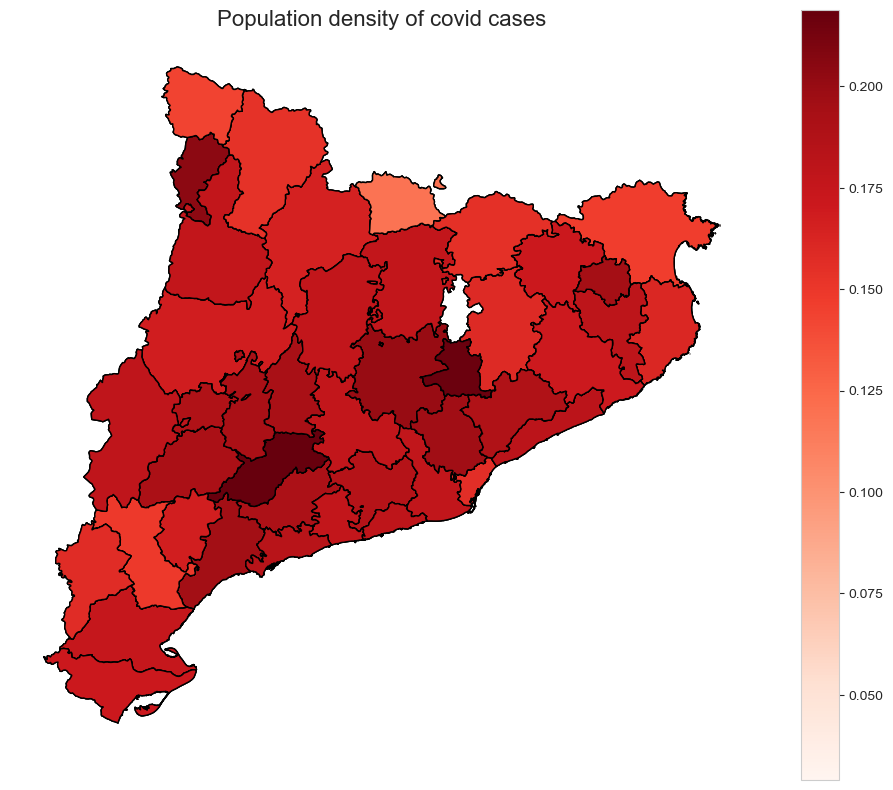

In [257]:
ax=densitat20.plot(
 column="density",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 #norm= LogNorm(vmin=densitat["density"].min(),
  #               vmax=densitat["density"].max())
)

ax.set_title("Population density of covid cases", fontsize=16)
ax.set_axis_off()
plt.show()

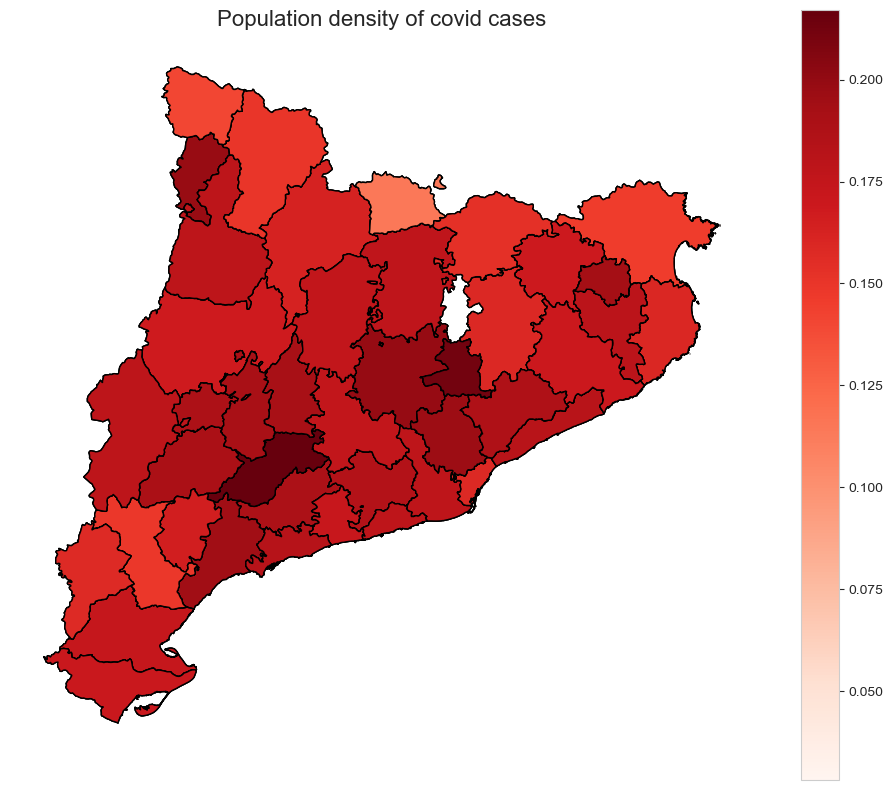

In [258]:
ax=densitat21.plot(
 column="density",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 #norm= LogNorm(vmin=densitat["density"].min(),
  #               vmax=densitat["density"].max())
)

ax.set_title("Population density of covid cases", fontsize=16)
ax.set_axis_off()
plt.show()

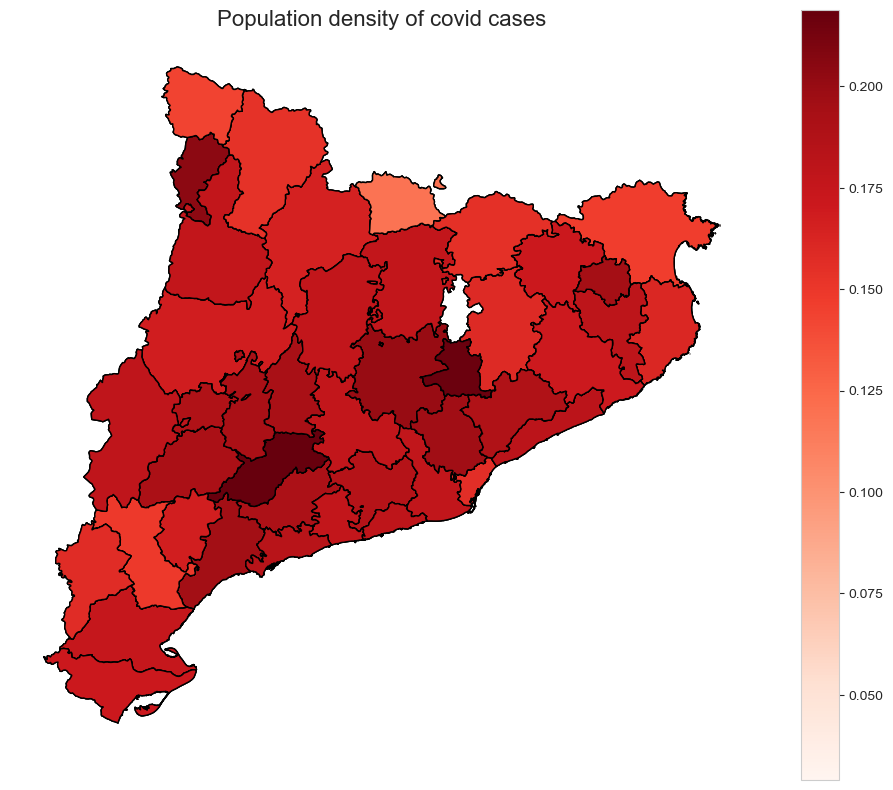

In [259]:
ax=densitat22.plot(
 column="density",
 cmap="Reds",
 legend=True,
 edgecolor="black",
 figsize=(12,10),
 #norm= LogNorm(vmin=densitat["density"].min(),
  #               vmax=densitat["density"].max())
)

ax.set_title("Population density of covid cases", fontsize=16)
ax.set_axis_off()
plt.show()

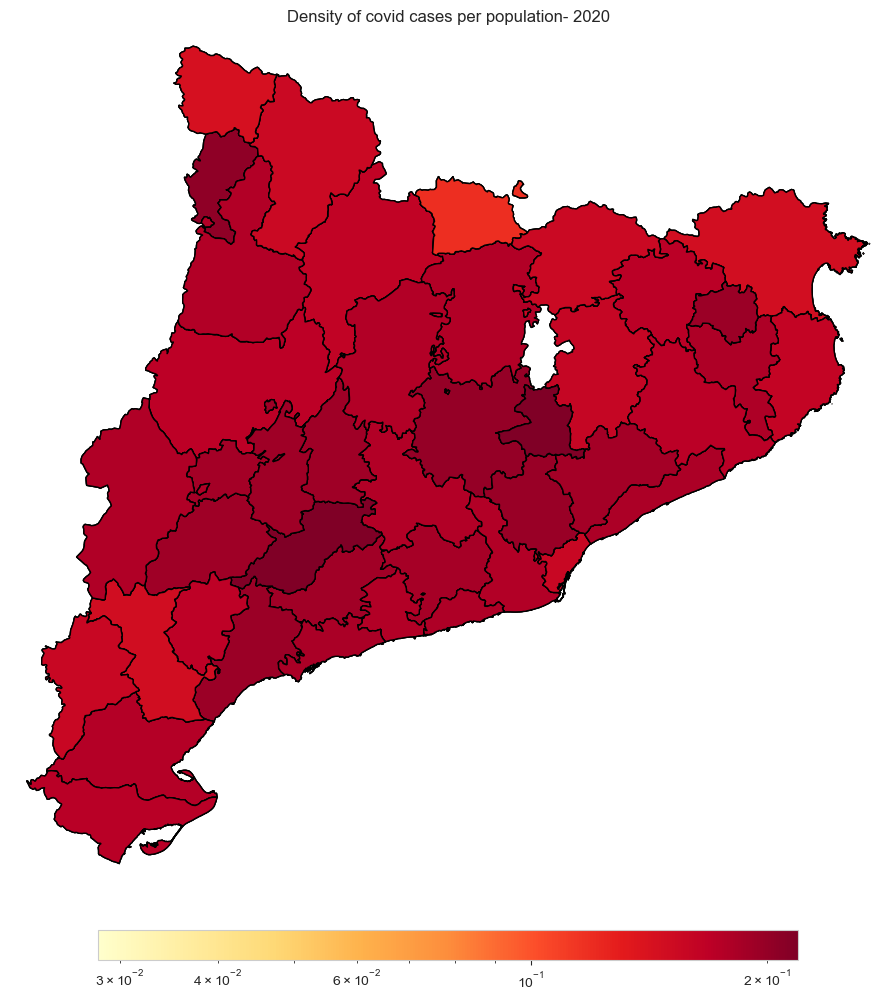

In [260]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import LogNorm, Normalize
import matplotlib.cm as cm
import pandas as pd

# ensure densitat20/21/22 exist
for name in ('densitat20','densitat21','densitat22'):
    if name not in globals():
        raise NameError(f"{name} not found - run the cells that produce densitat20/21/densitat22 first")

# compute global vmin/vmax across the three years (skip NaN)
vals = []
for d in (densitat20, densitat21, densitat22):
    if 'density' in d.columns:
        vals.append(d['density'].dropna())
all_vals = pd.concat(vals) if vals else pd.Series([])
vmin = all_vals.min() if not all_vals.empty else 1e-6
vmax = all_vals.max() if not all_vals.empty else 1.0

# choose normalization (use LogNorm if positive)
if vmin > 0:
    norm = LogNorm(vmin=vmin, vmax=vmax)
else:
    norm = Normalize(vmin=vmin, vmax=vmax)

cmap = plt.get_cmap('YlOrRd')
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(all_vals if not all_vals.empty else [vmin, vmax])

# determine fixed map extent from base covidmap geometry
minx, miny, maxx, maxy = covidmap.total_bounds
pad_frac = 0.02
dx = (maxx - minx) * pad_frac
dy = (maxy - miny) * pad_frac
xlim = (minx - dx, maxx + dx)
ylim = (miny - dy, maxy + dy)

# create figure, fixed main axis and fixed colorbar axis
fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.12)                     # space for colorbar
main_ax_pos = [0.05, 0.12, 0.9, 0.85]
ax.set_position(main_ax_pos)

cax = fig.add_axes([0.15, 0.04, 0.7, 0.03])         # fixed pos for horizontal colorbar
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
#cbar.set_label('Population density of covid cases')

# mapping of frames to GeoDataFrames and titles
frames = [(2020, densitat20, "Density of covid cases per population- 2020"),
          (2021, densitat21, "Density of covid cases per population- 2021"),
          (2022, densitat22, "Density of covid cases per population - 2022")]

def actualizar(i):
    year, gdf, title = frames[i]
    ax.clear()
    if 'density' not in gdf.columns:
        ax.text(0.5, 0.5, f"No 'density' column for {year}", ha='center', va='center')
        ax.set_axis_off()
        return

    # plot without geopandas' automatic legend (we use fixed colorbar)
    gdf.plot(column='density', ax=ax, cmap=cmap, norm=norm, legend=False, edgecolor='black')
    ax.set_title(title)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect('equal', adjustable='box')
    ax.set_axis_off()
    # colorbar already fixed; update label if desired
    #cbar.set_label(f'Population density of covid cases {year}')

# create and keep a reference to the animation
ani = FuncAnimation(fig, actualizar, frames=len(frames), interval=1000, repeat=False)

# render inline in the notebook
HTML(ani.to_jshtml())

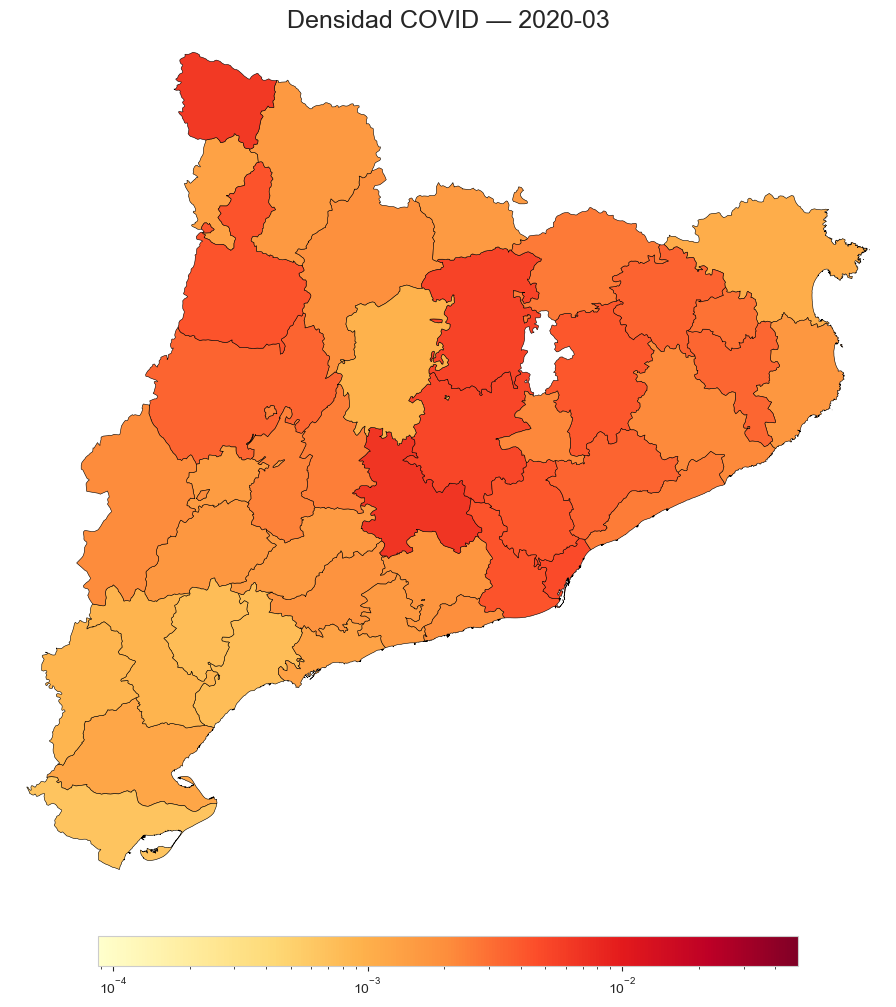

In [261]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.colors import LogNorm, Normalize
import matplotlib.cm as cm
import pandas as pd

# ============================================================
# 1. PREPARAR DATOS: FILTRAR Y ASEGURAR TIPOS CORRECTOS
# ============================================================

# Filtrar solo meses disponibles (>= marzo)
densitat_all_filtered = densitat_all[densitat_all["month"] >= 3].copy()

# Asegurar que year y month sean enteros
densitat_all_filtered["year"] = densitat_all_filtered["year"].astype(int)
densitat_all_filtered["month"] = densitat_all_filtered["month"].astype(int)

# Lista de frames: combinaciones únicas (año, mes), ordenadas
frames = densitat_all_filtered[["year", "month"]].drop_duplicates()
frames = frames.sort_values(["year", "month"]).reset_index(drop=True)

frames["year"] = frames["year"].astype(int)
frames["month"] = frames["month"].astype(int)

# ============================================================
# 2. NORMALIZACIÓN GLOBAL DE LA DENSIDAD (COLORBAR FIJO)
# ============================================================

all_vals = densitat_all_filtered["density"].dropna()

vmin = all_vals.min() if not all_vals.empty else 1e-6
vmax = all_vals.max() if not all_vals.empty else 1.0

# Normalización logarítmica si los valores son positivos
if vmin > 0:
    norm = LogNorm(vmin=vmin, vmax=vmax)
else:
    norm = Normalize(vmin=vmin, vmax=vmax)

cmap = plt.get_cmap('YlOrRd')

sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(all_vals)

# ============================================================
# 3. EXTENT FIJO PARA QUE EL MAPA NO SALTE ENTRE FRAMES
# ============================================================

minx, miny, maxx, maxy = covidmap.total_bounds
pad_frac = 0.02
dx = (maxx - minx) * pad_frac
dy = (maxy - miny) * pad_frac

xlim = (minx - dx, maxx + dx)
ylim = (miny - dy, maxy + dy)

# ============================================================
# 4. FIGURA Y COLORBAR FIJOS
# ============================================================

fig, ax = plt.subplots(figsize=(10, 10))
fig.subplots_adjust(bottom=0.12)

# posición del eje principal (igual que tu animación anual)
ax.set_position([0.05, 0.12, 0.9, 0.85])

# eje para la barra de color
cax = fig.add_axes([0.15, 0.04, 0.7, 0.03])
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')

# ============================================================
# 5. FUNCIÓN DE ACTUALIZACIÓN POR FRAME
# ============================================================

def actualizar(i):
    year = frames.loc[i, "year"]
    month = frames.loc[i, "month"]

    # Filtrar datos del frame actual
    gdf = densitat_all_filtered[
        (densitat_all_filtered["year"] == year) &
        (densitat_all_filtered["month"] == month)
    ]
    
    ax.clear()

    if gdf.empty:
        ax.text(0.5, 0.5, f"Sin datos {year}-{month:02d}",
                ha='center', va='center')
        ax.axis("off")
        return

    gdf.plot(
        column="density",
        ax=ax,
        cmap=cmap,
        norm=norm,
        legend=False,
        edgecolor="black",
        linewidth=0.4
    )

    ax.set_title(f"Densidad COVID — {year}-{month:02d}", fontsize=18)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_aspect("equal", adjustable='box')
    ax.axis("off")

# ============================================================
# 6. CREAR ANIMACIÓN
# ============================================================

ani = FuncAnimation(fig, actualizar, frames=len(frames), interval=800, repeat=False)

HTML(ani.to_jshtml())


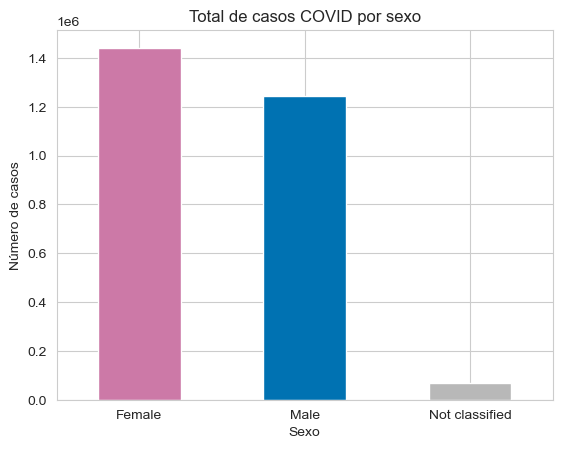

In [272]:


# sexo y sumar casos
cases_sex= covid.groupby("SexeDescripcio")["NumCasos"].sum()
colors = ["#CC79A7", "#0072B2", "#B8B8B8"]
# Hacer el plot
cases_sex.plot(kind="bar", color=colors)

plt.title("Total de casos COVID por sexo")
plt.ylabel("Número de casos")
plt.xlabel("Sexo")
plt.xticks(rotation=0)
plt.show()

/var/folders/80/grlgb68n7h39sbm5_grpw44w0000gn/T/ipykernel_24262/3538568421.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


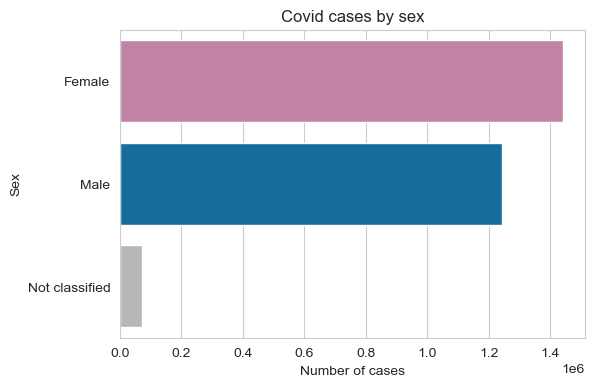

In [278]:
import seaborn as sns
colors = ["#CC79A7", "#0072B2", "#B8B8B8"]
sns.set_style("whitegrid")

plt.figure(figsize=(6,4))
sns.barplot(
    x=cases_sex.values,
    y=cases_sex.index,
    palette=colors
)
plt.title("Covid cases by sex")
plt.xlabel("Number of cases")
plt.ylabel("Sex")
plt.show()

In [271]:
plt.figure(figsize=(6,6))
colors = ["#CC79A7", "#0072B2", "#B8B8B8"]
plt.pie(
    cases_sex,
    labels=cases_sex.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

# Círculo blanco para hacer efecto donut
centro = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centro)

plt.title("Distribution of COVID cases by sex")
plt.show()

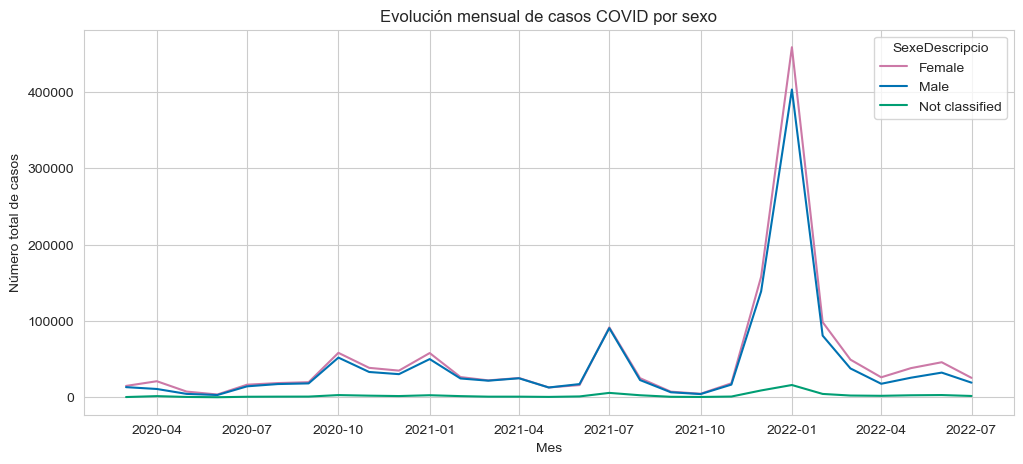

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt




df_mensual = (
    covid
        .groupby(["year", "month", "SexeDescripcio"])["NumCasos"]
        .sum()
        .reset_index()
)

df_mensual["Time"] = pd.to_datetime(
    df_mensual["year"].astype(str) + "-" + df_mensual["month"].astype(str) + "-01"
)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.lineplot(
    data=df_mensual,
    x="Time",
    y="NumCasos",
    hue="SexeDescripcio",
    palette=["#CC79A7", "#0072B2", "#009E73"]  # rosa accesible, azul, verde
)

plt.title("Monthly trend of COVID cases by sex")
plt.xlabel("Month")
plt.ylabel("Covid cases")
plt.show()

In [275]:
covid.head()

TipusCasData  ComarcaCodi           NOMCOMAR  MunicipiCodi  \
0   2020-10-08         21.0            MARESME        8121.0   
1   2022-07-05         23.0            NOGUERA       25240.0   
2   2020-06-12          7.0              BAGES        8191.0   
3   2022-01-13         24.0              OSONA        8037.0   
4   2022-06-11         40.0  VALLÈS OCCIDENTAL        8279.0   

       MunicipiDescripcio  DistricteCodi DistricteDescripcio  SexeCodi  \
0                  MATARÓ            NaN      Not classified       1.0   
1  VALLFOGONA DE BALAGUER            NaN      Not classified       1.0   
2                 SALLENT            NaN      Not classified       1.0   
3             CALLDETENES            NaN      Not classified       1.0   
4                TERRASSA            NaN      Not classified       0.0   

  SexeDescripcio      TipusCasDescripcio  NumCasos  year  month  
0         Female  Positiu per Test Ràpid         1  2020     10  
1         Female             Positiu TAR         2  2022      7  
2         Female  Positiu per Test Ràpid         1  2020      6  
3         Female             Positiu PCR         1  2022      1  
4           Male             Positiu TAR        10  2022      6